# Uber Data Analysis
## Uber Pickups Numbers in New York City 
## Xiaodan Chen 
## 2021-10-14

# Introduction:

In this Python project, using the Python libraries pandas, numpy, matplotlib, and seaborn, I analyze the Uber Pickups in New York City dataset. I present the number of trips during every hour, every day, every day of the week, and every month. I also use data visualization such as bar plots and heatmaps to help understand the data and develop an intuition for understanding the customers' who avail the trips.

### Importing the Essential Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

### Reading Data

In [54]:
uber_df = pd.read_csv('/Users/dani/Desktop/Python_Project/Uber/uber_data.csv')

In [55]:
uber_df.tail(5)

,Unnamed: 0,Date.Time,Lat,Lon,Base
4534322,4534323,9/30/2014 22:57:00,40.7668,-73.9845,B02764
4534323,4534324,9/30/2014 22:57:00,40.6911,-74.1773,B02764
4534324,4534325,9/30/2014 22:58:00,40.8519,-73.9319,B02764
4534325,4534326,9/30/2014 22:58:00,40.7081,-74.0066,B02764
4534326,4534327,9/30/2014 22:58:00,40.7140,-73.9496,B02764


### Checking for Missing Values

The dataset does not contain any missing value.

In [59]:
uber_df.isnull().values.any()

False

### Data Structure

This dataset contains more than 4.5 millions observations and 5 columns.
The data type of Date.Time column is object.

In [58]:
uber_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4534327 entries, 0 to 4534326
Data columns (total 5 columns):
 #   Column      Dtype  
---  ------      -----  
 0   Unnamed: 0  int64  
 1   Date.Time   object 
 2   Lat         float64
 3   Lon         float64
 4   Base        object 
dtypes: float64(2), int64(1), object(2)
memory usage: 173.0+ MB


### Changing the Format of Date.Time to datetime 

In [61]:
uber_df['Date.Time'] = pd.to_datetime(uber_df['Date.Time'],format = '%m/%d/%Y %H:%M:%S')
uber_df.dtypes

Unnamed: 0             int64
Date.Time     datetime64[ns]
Lat                  float64
Lon                  float64
Base                  object
dtype: object

### Creating Factors of time objects such as day, month, year, hour, and dayofweek

In [26]:
uber_df['hour'] = uber_df['Date.Time'].dt.hour
uber_df['day'] = uber_df['Date.Time'].dt.day
uber_df['month'] = uber_df['Date.Time'].dt.month_name()
uber_df['year'] = uber_df['Date.Time'].dt.year
uber_df['dayofweek'] = uber_df['Date.Time'].dt.day_name()
uber_df

,Unnamed: 0,Date.Time,Lat,Lon,Base,hour,day,month,year,dayofweek
0,1,2014-04-01 00:11:00,40.7690,-73.9549,B02512,0,1,April,2014,Tuesday
1,2,2014-04-01 00:17:00,40.7267,-74.0345,B02512,0,1,April,2014,Tuesday
2,3,2014-04-01 00:21:00,40.7316,-73.9873,B02512,0,1,April,2014,Tuesday
3,4,2014-04-01 00:28:00,40.7588,-73.9776,B02512,0,1,April,2014,Tuesday
4,5,2014-04-01 00:33:00,40.7594,-73.9722,B02512,0,1,April,2014,Tuesday
...,...,...,...,...,...,...,...,...,...,...
4534322,4534323,2014-09-30 22:57:00,40.7668,-73.9845,B02764,22,30,September,2014,Tuesday
4534323,4534324,2014-09-30 22:57:00,40.6911,-74.1773,B02764,22,30,September,2014,Tuesday
4534324,4534325,2014-09-30 22:58:00,40.8519,-73.9319,B02764,22,30,September,2014,Tuesday
4534325,4534326,2014-09-30 22:58:00,40.7081,-74.0066,B02764,22,30,September,2014,Tuesday


### Number of Trips in a Day

The number of trips that the passengers made in a day, showing the number of passengers fares throughout the day. 

In [30]:
hour = uber_df['hour']
hour_df = hour.value_counts()
hour_df

17    336190
18    324679
16    313400
19    294513
20    284604
21    281460
15    275466
22    241858
14    230625
13    195877
7     193094
8     190504
12    170452
23    169190
11    165703
9     159967
10    159148
6     143213
0     103836
5      83939
1      67227
4      55230
3      48287
2      45865
Name: hour, dtype: int64

The number of trips are higher in the evening around 5:00 and 6:00 PM. 

[Text(0.5, 1.0, 'Number of Trips in a Day')]

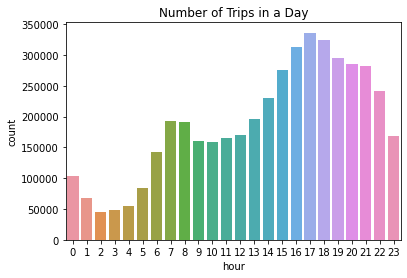

In [31]:
fig, ax = plt.subplots()
sns.countplot(data=uber_df, x = 'hour')
ax.set(title = 'Number of Trips in a Day')

### Number of Trips during Every Day of the Month

The result shows the 30th of the month had the higest trips in the year. 

In [32]:
day = uber_df['day']
day_df = day.value_counts()
day_df

30    167160
12    160606
16    158921
13    156892
23    156032
9     155135
15    153726
26    153405
19    153088
25    152667
17    152524
10    152500
18    151319
29    149086
11    148860
5     147054
22    146952
8     145984
27    145652
20    144179
24    144169
7     143503
2     143201
3     142983
28    141157
21    141112
4     140923
14    140148
6     139886
1     127430
31     78073
Name: day, dtype: int64

[Text(0.5, 1.0, 'Number of Trips During Every day of the Month')]

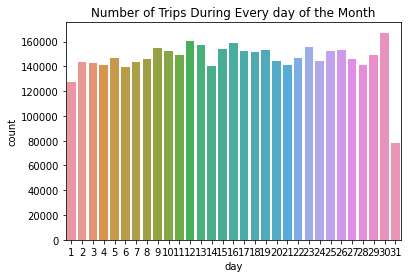

In [33]:
fig, ax = plt.subplots()
sns.countplot(data=uber_df, x = 'day')
ax.set(title = 'Number of Trips During Every day of the Month')

### Number of Trips on Every Day of the Week

In [34]:
week = uber_df['dayofweek']
week_df = week.value_counts()
week_df

Thursday     755145
Friday       741139
Wednesday    696488
Tuesday      663789
Saturday     646114
Monday       541472
Sunday       490180
Name: dayofweek, dtype: int64

[Text(0.5, 1.0, 'Number of Trips on Every Day of the Week')]

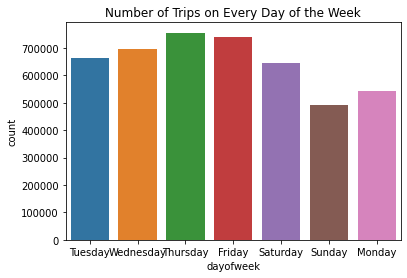

In [35]:
fig, ax = plt.subplots()
sns.countplot(data=uber_df, x = 'dayofweek')
ax.set(title = 'Number of Trips on Every Day of the Week')

In [36]:
month = uber_df['month']
month_df = month.value_counts()
month_df

September    1028136
August        829275
July          796121
June          663844
May           652435
April         564516
Name: month, dtype: int64

### Number of Trips Taking Place during Months in a Year

[Text(0.5, 1.0, 'Number of Trips During Months in a Year')]

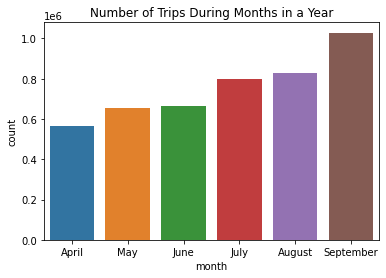

In [37]:
fig, ax = plt.subplots()
sns.countplot(data = uber_df, x = 'month')
ax.set(title = 'Number of Trips During Months in a Year')

In [38]:
week_month = uber_df[['month', 'dayofweek', 'Date.Time']]
week_month = week_month.groupby(['month', 'dayofweek']).agg('count')
week_month

Date.Time
month     dayofweek           
April     Friday         90303
          Monday         60861
          Saturday       77218
          Sunday         51251
          Thursday       85067
          Tuesday        91185
          Wednesday     108631
August    Friday        148674
          Monday         91633
          Saturday      132225
          Sunday        110246
          Thursday      124117
          Tuesday       107124
          Wednesday     115256
July      Friday        102735
          Monday         93189
          Saturday       90260
          Sunday         76327
          Thursday      148439
          Tuesday       137454
          Wednesday     147717
June      Friday        105056
          Monday         94655
          Saturday       81364
          Sunday         79656
          Thursday      115325
          Tuesday        88134
          Wednesday      99654
May       Friday        133991
          Monday         63846
          Saturday      102990
          Sunday         56168
          Thursday      128921
          Tuesday        76662
          Wednesday      89857
September Friday        160380
          Monday        137288
          Saturday      162057
          Sunday        116532
          Thursday      153276
          Tuesday       163230
          Wednesday     135373

### Number of Trips on Day of Week during Months

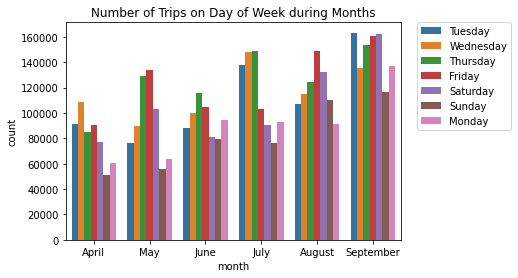

In [39]:
fig, ax = plt.subplots()
sns.countplot(x='month', data = uber_df, hue = 'dayofweek')
ax.set(title = 'Number of Trips on Day of Week during Months')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [40]:
week_month = week_month.pivot_table(index='month', columns='dayofweek', values='Date.Time')
week_month

dayofweek,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
month,,,,,,,
April,90303,60861,77218,51251,85067,91185,108631
August,148674,91633,132225,110246,124117,107124,115256
July,102735,93189,90260,76327,148439,137454,147717
June,105056,94655,81364,79656,115325,88134,99654
May,133991,63846,102990,56168,128921,76662,89857
September,160380,137288,162057,116532,153276,163230,135373


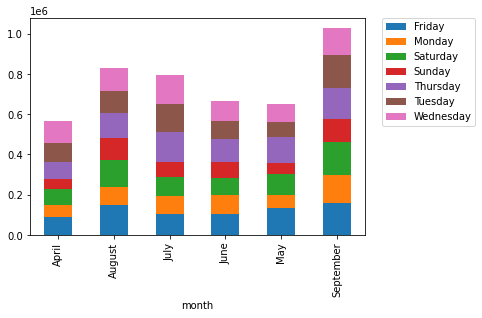

In [41]:
week_month.plot(kind='bar', stacked=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

### Number of Trips on Day during Months

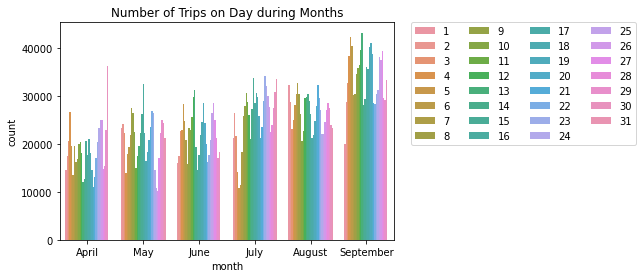

In [42]:
fig, ax = plt.subplots()
sns.countplot(x='month', data = uber_df, hue = 'day')
ax.set(title = 'Number of Trips on Day during Months')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncol=4)

In [43]:
day_mon = uber_df[['month', 'day', 'Date.Time']]
day_mon = day_mon.groupby(['month', 'day']).agg('count')
day_month = day_mon.pivot_table(index='day', columns='month', values='Date.Time')
mon_day = day_mon.pivot_table(index='month', columns='day', values='Date.Time')
mon_day

day,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
month,,,,,,,,,,,,,,,,,,,,,
April,14546.0,17474.0,20701.0,26714.0,19521.0,13445.0,19550.0,16188.0,16843.0,20041.0,...,16975.0,20346.0,23352.0,25095.0,24925.0,14677.0,15475.0,22835.0,36251.0,NaN
August,32353.0,28678.0,23146.0,24952.0,28094.0,30495.0,32759.0,30411.0,26286.0,20584.0,...,29512.0,27097.0,22036.0,22093.0,24550.0,27018.0,28597.0,27424.0,23930.0,23271.0
July,21228.0,26480.0,21597.0,14148.0,10890.0,11443.0,18280.0,25763.0,27817.0,30541.0,...,29029.0,34073.0,32050.0,29975.0,27708.0,22590.0,23981.0,27589.0,30740.0,33541.0
June,15967.0,17503.0,22674.0,22831.0,28371.0,24683.0,20889.0,15749.0,23244.0,22874.0,...,16322.0,17735.0,20779.0,26460.0,28516.0,24895.0,21208.0,17107.0,18395.0,NaN
May,23375.0,24235.0,22234.0,13918.0,17859.0,19300.0,21891.0,27513.0,26385.0,22550.0,...,26802.0,26465.0,14651.0,10841.0,10202.0,17004.0,22240.0,24930.0,24413.0,21261.0
September,19961.0,28831.0,32631.0,38360.0,42319.0,40520.0,30134.0,30360.0,34560.0,35910.0,...,28312.0,30316.0,31301.0,38203.0,37504.0,39468.0,29656.0,29201.0,33431.0,NaN


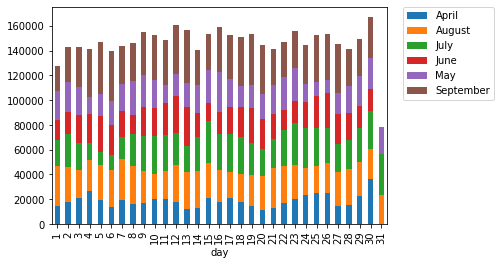

In [44]:
day_month.plot(kind='bar', stacked=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

### Number of Trips in Hour during Months

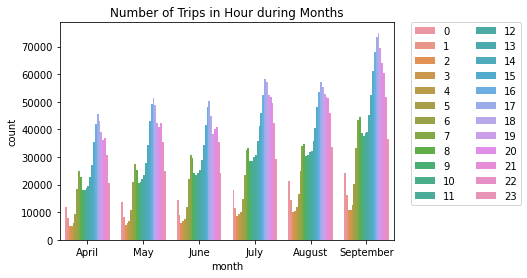

In [45]:
fig, ax = plt.subplots()
sns.countplot(x='month', data = uber_df, hue = 'hour')
ax.set(title = 'Number of Trips in Hour during Months')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncol=2)

In [46]:
hour_mon = uber_df[['month', 'hour', 'Date.Time']]
hour_mon = hour_mon.groupby(['month', 'hour']).agg('count')
hour_month = hour_mon.pivot_table(index='hour', columns='month', values='Date.Time')
month_hour = hour_mon.pivot_table(index='month', columns='hour', values='Date.Time')
month_hour

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
month,,,,,,,,,,,,,,,,,,,,,
April,11910,7769,4935,5040,6095,9476,18498,24924,22843,17939,...,27190,35324,42003,45475,43003,38923,36244,36964,30645,20649
August,21451,14471,10105,10376,11774,16525,24907,34064,34566,30195,...,40644,48197,53481,57122,55390,53008,51674,51354,46008,33609
July,17953,11527,8562,9199,10040,14932,23456,32545,33387,28486,...,41357,46053,52403,58260,57268,52332,51859,49528,42218,29346
June,14514,9167,6189,6937,7701,11955,22030,30834,29771,24298,...,34428,41586,48162,50452,45013,38203,40108,40791,35614,24182
May,13875,8186,5372,5946,6945,10789,21015,27413,25460,20507,...,34363,43087,49127,51508,48965,42387,40731,42217,35556,24836
September,24133,16107,10702,10789,12675,20262,33307,43314,44477,38542,...,52643,61219,68224,73373,75040,69660,63988,60606,51817,36568


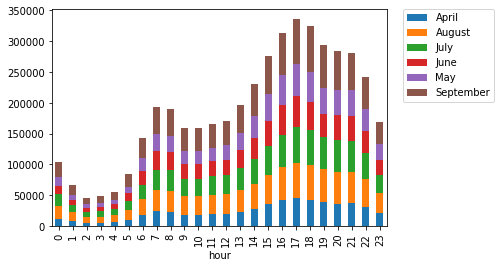

In [47]:
hour_month.plot(kind='bar', stacked=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

### Heatmap Visualization of Hour, Day, Day of Week and Month

Heatmap by Hour and Day.

[Text(0.5, 1.0, 'Heatmap by Hour and Day')]

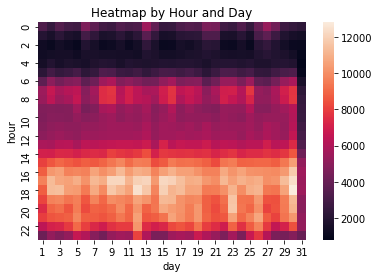

In [48]:
hour_day = uber_df[['day', 'hour', 'Date.Time']]
hour_day = hour_day.groupby(['day', 'hour']).agg('count')
hour_day = hour_day.pivot_table(index='hour', columns='day', values='Date.Time')

fig, ax = plt.subplots()
sns.heatmap(hour_day)
ax.set(title = 'Heatmap by Hour and Day')

Heatmap by Month and Day.

[Text(0.5, 1.0, 'Heatmap by Month and Day')]

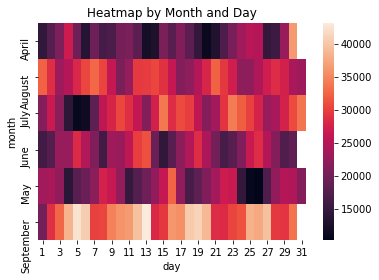

In [49]:
month_day = uber_df[['day', 'month', 'Date.Time']]
month_day = month_day.groupby(['day', 'month']).agg('count')
month_day = month_day.pivot_table(index='month', columns='day', values='Date.Time')

fig, ax = plt.subplots()
sns.heatmap(month_day)
ax.set(title = 'Heatmap by Month and Day')

Heatmap by Month and Day of the Week.

[Text(0.5, 1.0, 'Heatmap by Month and Day of the Week')]

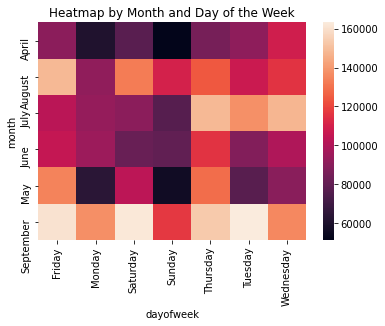

In [50]:
fig, ax = plt.subplots()
sns.heatmap(week_month)
ax.set(title = 'Heatmap by Month and Day of the Week')

Heatmap by Hour and Month.

[Text(0.5, 1.0, 'Heatmap by Hour and Month')]

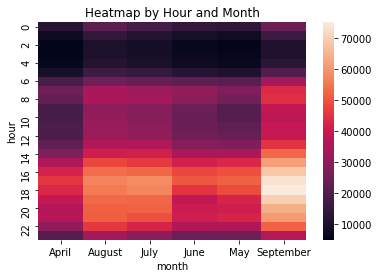

In [51]:
fig, ax = plt.subplots()
sns.heatmap(hour_month)
ax.set(title = 'Heatmap by Hour and Month')